In [6]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv("sim_data_full.csv")
df["drug_duration"] = "short"
df["drug_duration"].loc[df["drug_type"]=="DP"] = "long"

df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
# df_pfpr = df[df["baseline_transmission_metric"]=="eir"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

df_eir = df[df["baseline_transmission_metric"]=="eir"].reset_index(drop=True)

c:\users\joshsu\venv\dev\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
south_central_scenarios_to_plot = [1,56,57,
                                   4,58,59,
                                   13,34,35,
                                   16,60,61]
df1 = df_pfpr[np.logical_and(np.in1d(df_pfpr["archetype"], ["Central", "Southern"]),
                             np.in1d(df_pfpr["scenario_number"], south_central_scenarios_to_plot))].reset_index(drop=True)

sahel_scenarios_to_plot = [1,64,65,
                           4,66,67,
                           13,44,43, # note: Sahel scenarios are opposite order of ivermectin/primaquine
                           16,68,69]
df2 = df_pfpr[np.logical_and(df_pfpr["archetype"]=="Sahel",
                             np.in1d(df_pfpr["scenario_number"], sahel_scenarios_to_plot))].reset_index(drop=True)

df_plot = pd.concat([df1,df2], ignore_index=True)

# df_pfpr = df_pfpr[np.in1d(df_pfpr["scenario_number"], scenarios_to_plot)].reset_index(drop=True)


In [9]:
list(df2.columns)

['archetype',
 'baseline_transmission_metric',
 'transmission_level',
 'scenario_number',
 'iptsc_rdts_used',
 'iptsc_drugs_used',
 'cases_treated',
 'severe_cases_treated',
 'received_smc',
 'received_ivermectin',
 'received_primaquine',
 'pfpr0_5',
 'pfpr2_10',
 'pfpr6_15',
 'pfpr16_500',
 'pfpr_all',
 'clinical_incidence0_5',
 'clinical_incidence2_10',
 'clinical_incidence6_15',
 'clinical_incidence16_500',
 'clinical_incidence_all',
 'severe_incidence0_5',
 'severe_incidence2_10',
 'severe_incidence6_15',
 'severe_incidence16_500',
 'severe_incidence_all',
 'pop0_5',
 'pop2_10',
 'pop6_15',
 'pop16_500',
 'pop_all',
 'avg_age',
 'avg_age_clinical_cases',
 'avg_age_severe_cases',
 'Run_Number',
 'iptsc_rdts_used_STDEV',
 'iptsc_drugs_used_STDEV',
 'cases_treated_STDEV',
 'severe_cases_treated_STDEV',
 'received_smc_STDEV',
 'received_ivermectin_STDEV',
 'received_primaquine_STDEV',
 'pfpr0_5_STDEV',
 'pfpr2_10_STDEV',
 'pfpr6_15_STDEV',
 'pfpr16_500_STDEV',
 'pfpr_all_STDEV',
 'clin

In [10]:
foo = df2[["scenario_number", "transmission_level", "frac_averted_clinical__all", "clinical_incidence_all","pfpr_all", "ivermectin", "primaquine", "drug_type", "interval"]]
foo = foo[np.in1d(foo["scenario_number"],[16,68,69])]
foo

,scenario_number,transmission_level,frac_averted_clinical__all,clinical_incidence_all,pfpr_all,ivermectin,primaquine,drug_type,interval
3,16,0.05,0.578653,0.308359,0.059528,False,False,DP,month
10,68,0.05,0.653039,0.253920,0.049658,True,False,DP,month
11,69,0.05,0.584927,0.303768,0.058187,False,True,DP,month
15,16,0.10,0.471410,0.478628,0.101338,False,False,DP,month
22,68,0.10,0.532930,0.422922,0.090067,True,False,DP,month
23,69,0.10,0.496420,0.455982,0.097138,False,True,DP,month
27,16,0.20,0.467021,0.552236,0.137277,False,False,DP,month
34,68,0.20,0.523526,0.493689,0.123743,True,False,DP,month
35,69,0.20,0.483668,0.534988,0.134238,False,True,DP,month
39,16,0.30,0.445095,0.641124,0.176078,False,False,DP,month


<AxesSubplot:xlabel='clinical_incidence_all', ylabel='pfpr_all'>

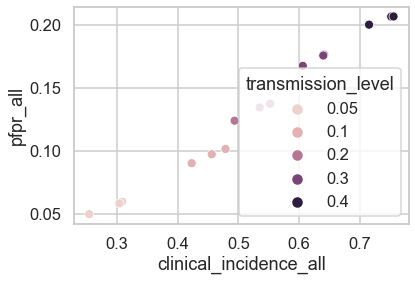

In [11]:
sns.scatterplot(data=foo, x="clinical_incidence_all",y="pfpr_all", hue="transmission_level")

In [12]:
foo.groupby

<bound method DataFrame.groupby of     scenario_number  transmission_level  frac_averted_clinical__all  \
3                16                0.05                    0.578653   
10               68                0.05                    0.653039   
11               69                0.05                    0.584927   
15               16                0.10                    0.471410   
22               68                0.10                    0.532930   
23               69                0.10                    0.496420   
27               16                0.20                    0.467021   
34               68                0.20                    0.523526   
35               69                0.20                    0.483668   
39               16                0.30                    0.445095   
46               68                0.30                    0.475395   
47               69                0.30                    0.446146   
51               16                0.40   

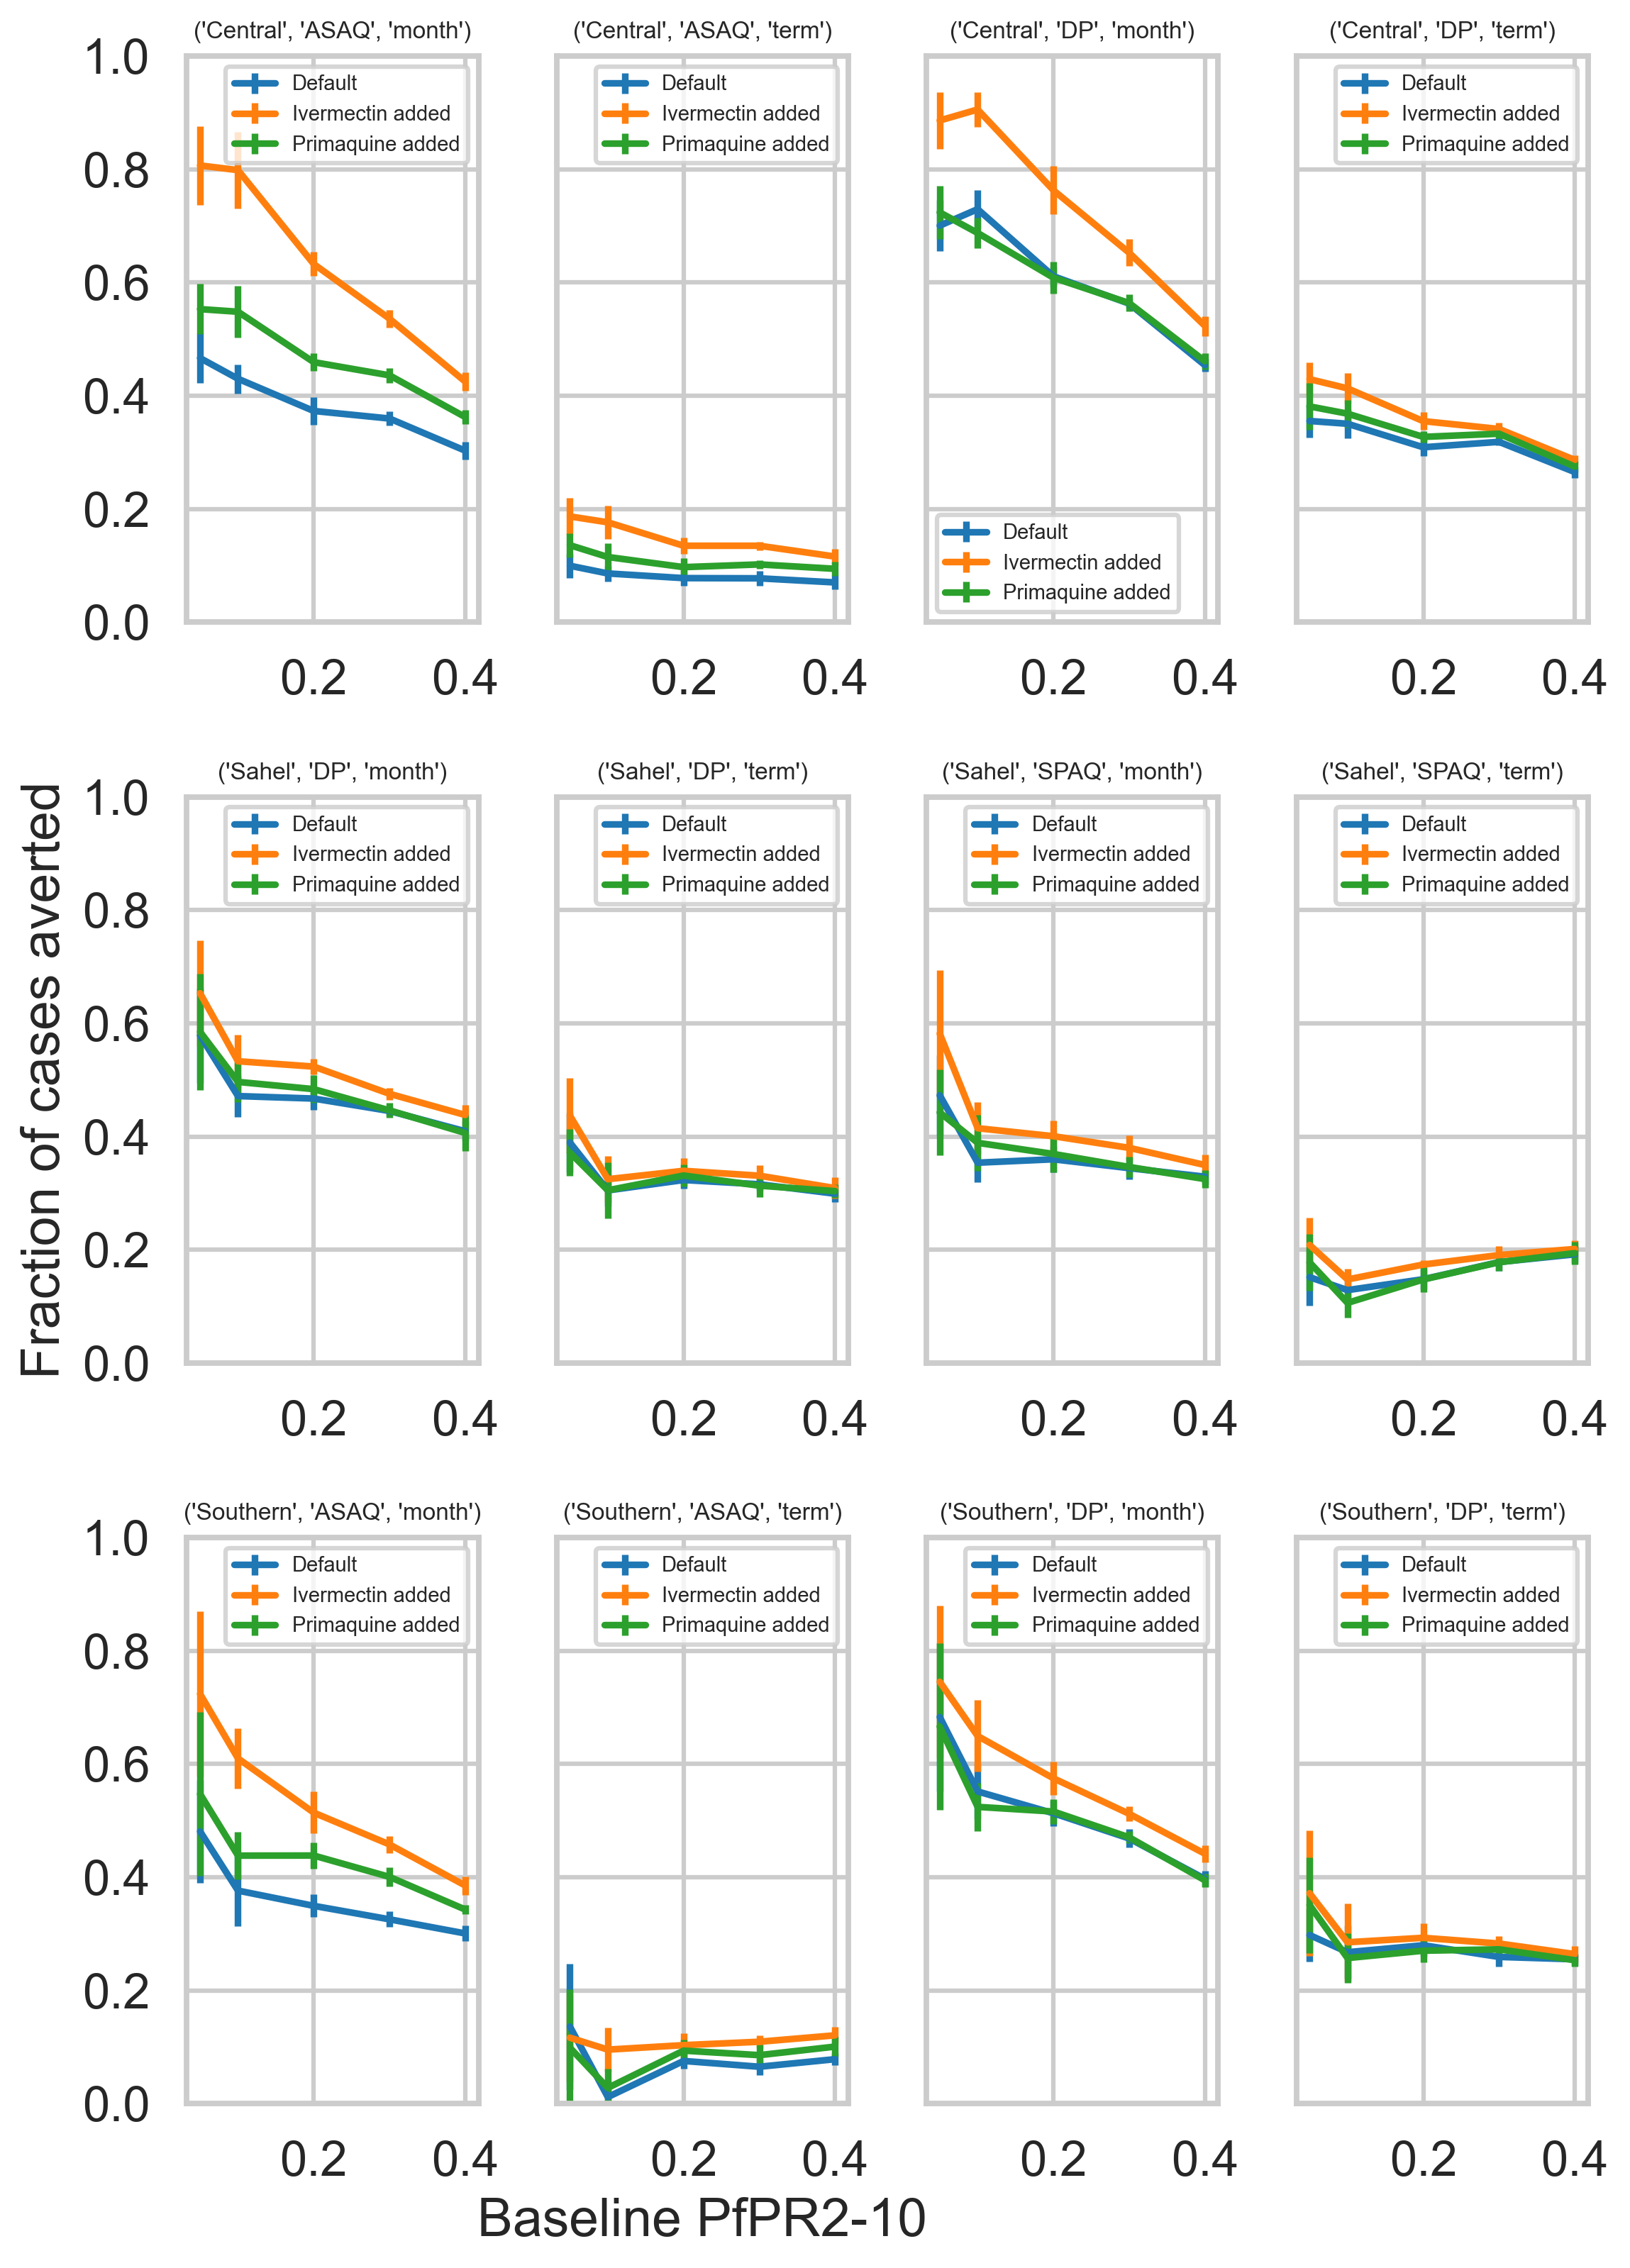

In [13]:
# h = df_pfpr[df_pfpr["archetype"]=="Southern"]
i = 1
plt.figure(dpi=300, figsize=(8,11))
for ii, sdf in df_plot.groupby(["archetype", "drug_type", "interval"]):
    

    regular = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==False)]
    iver = sdf[np.logical_and(sdf["ivermectin"]==True, sdf["primaquine"]==False)]
    prim = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==True)]
    
    plt.subplot(3,4,i)
    plt.errorbar(regular["transmission_level"], regular["frac_averted_clinical__all"], yerr=regular["frac_averted_clinical__all_STDEV"], label="Default")
    plt.errorbar(iver["transmission_level"], iver["frac_averted_clinical__all"], yerr=iver["frac_averted_clinical__all_STDEV"], label="Ivermectin added")
    plt.errorbar(prim["transmission_level"], prim["frac_averted_clinical__all"], yerr=prim["frac_averted_clinical__all_STDEV"], label="Primaquine added")
    plt.title(ii, fontsize=8)
    # plt.ylabel("Total cases averted")
    # plt.xlabel("Baseline PfPR2-10")
    
    # if i == 1:
    plt.legend(fontsize=7)
        
    if i not in [1,5,9]:
        ax = plt.gca()
        ax.set_yticklabels([])
    if i == 5:
        plt.ylabel("Fraction of cases averted")
    # if i in [9,10,11,12]:
        # plt.xlabel("Baseline PfPR2-10")
    if i == 10:
        plt.xlabel("Baseline PfPR2-10")
    
    plt.ylim([0,1.0])
    plt.tight_layout()
    i+=1
# plt.savefig("transmission_target.pdf")
# plt.savefig("transmission_target.png")

In [14]:
sdf[np.logical_and(df_pfpr["ivermectin"]==False, df_pfpr["primaquine"]==False)]

C:\Users\joshsu\AppData\Local\Temp/ipykernel_40140/2873416470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sdf[np.logical_and(df_pfpr["ivermectin"]==False, df_pfpr["primaquine"]==False)]


,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used,cases_treated,severe_cases_treated,received_smc,received_ivermectin,...,cost_SMC_high,cost_SMC_mean,cost_mean,cost_low_IPTsc_only,cost_high_IPTsc_only,cost_low_SMC_only,cost_high_SMC_only,cost_low,cost_high,drug_duration
62,Southern,pfpr,0.05,13,0.0,5039.0,1993.4,0.0,0.0,0.0,...,0.0,0.0,35608.1150,33970.4400,37245.7900,35608.1150,35608.1150,26594.8600,44621.3700,long
64,Southern,pfpr,0.05,34,0.0,5037.0,1807.4,0.0,0.0,5037.0,...,0.0,0.0,34750.0720,33113.0470,36387.0970,34750.0720,34750.0720,26425.6670,43074.4770,long
65,Southern,pfpr,0.05,35,0.0,5041.5,1873.6,0.0,0.0,0.0,...,0.0,0.0,35425.3075,33786.8200,37063.7950,35425.3075,35425.3075,26854.5000,43996.1150,long
74,Southern,pfpr,0.10,13,0.0,5506.2,2511.7,0.0,0.0,0.0,...,0.0,0.0,40455.8260,38666.3110,42245.3410,40455.8260,40455.8260,29373.0210,51538.6310,long
76,Southern,pfpr,0.10,34,0.0,5475.3,2443.0,0.0,0.0,5475.3,...,0.0,0.0,40390.7938,38611.3213,42170.2663,40390.7938,40390.7938,29572.2213,51209.3663,long
77,Southern,pfpr,0.10,35,0.0,5492.0,2553.0,0.0,0.0,0.0,...,0.0,0.0,41424.6700,39639.7700,43209.5700,41424.6700,41424.6700,30193.6700,52655.6700,long
86,Southern,pfpr,0.20,13,0.0,5120.3,3784.1,0.0,0.0,0.0,...,0.0,0.0,48440.2715,46776.1740,50104.3690,48440.2715,48440.2715,32775.0040,64105.5390,long
88,Southern,pfpr,0.20,34,0.0,5146.6,3755.6,0.0,0.0,5146.6,...,0.0,0.0,48774.8836,47102.2386,50447.5286,48774.8836,48774.8836,33206.5186,64343.2486,long
89,Southern,pfpr,0.20,35,0.0,5144.2,3820.3,0.0,0.0,0.0,...,0.0,0.0,49425.2920,47753.4270,51097.1570,49425.2920,49425.2920,33618.3170,65232.2670,long
100,Southern,pfpr,0.30,34,0.0,5410.9,4952.4,0.0,0.0,5410.9,...,0.0,0.0,57911.6614,56153.1189,59670.2039,57911.6614,57911.6614,37829.2389,77994.0839,long


# Plotting by EIR now

In [15]:
south_central_scenarios_to_plot = [1,56,57,
                                   4,58,59,
                                   13,34,35,
                                   16,60,61]
df1 = df_eir[np.logical_and(np.in1d(df_eir["archetype"], ["Central", "Southern"]),
                             np.in1d(df_eir["scenario_number"], south_central_scenarios_to_plot))].reset_index(drop=True)

sahel_scenarios_to_plot = [1,64,65,
                           4,66,67,
                           13,44,43, # note: Sahel scenarios are opposite order of ivermectin/primaquine
                           16,68,69]
df2 = df_eir[np.logical_and(df_eir["archetype"]=="Sahel",
                             np.in1d(df_eir["scenario_number"], sahel_scenarios_to_plot))].reset_index(drop=True)

df_plot = pd.concat([df1,df2], ignore_index=True)

# df_pfpr = df_pfpr[np.in1d(df_pfpr["scenario_number"], scenarios_to_plot)].reset_index(drop=True)


meta NOT subset; don't know how to subset; dropped


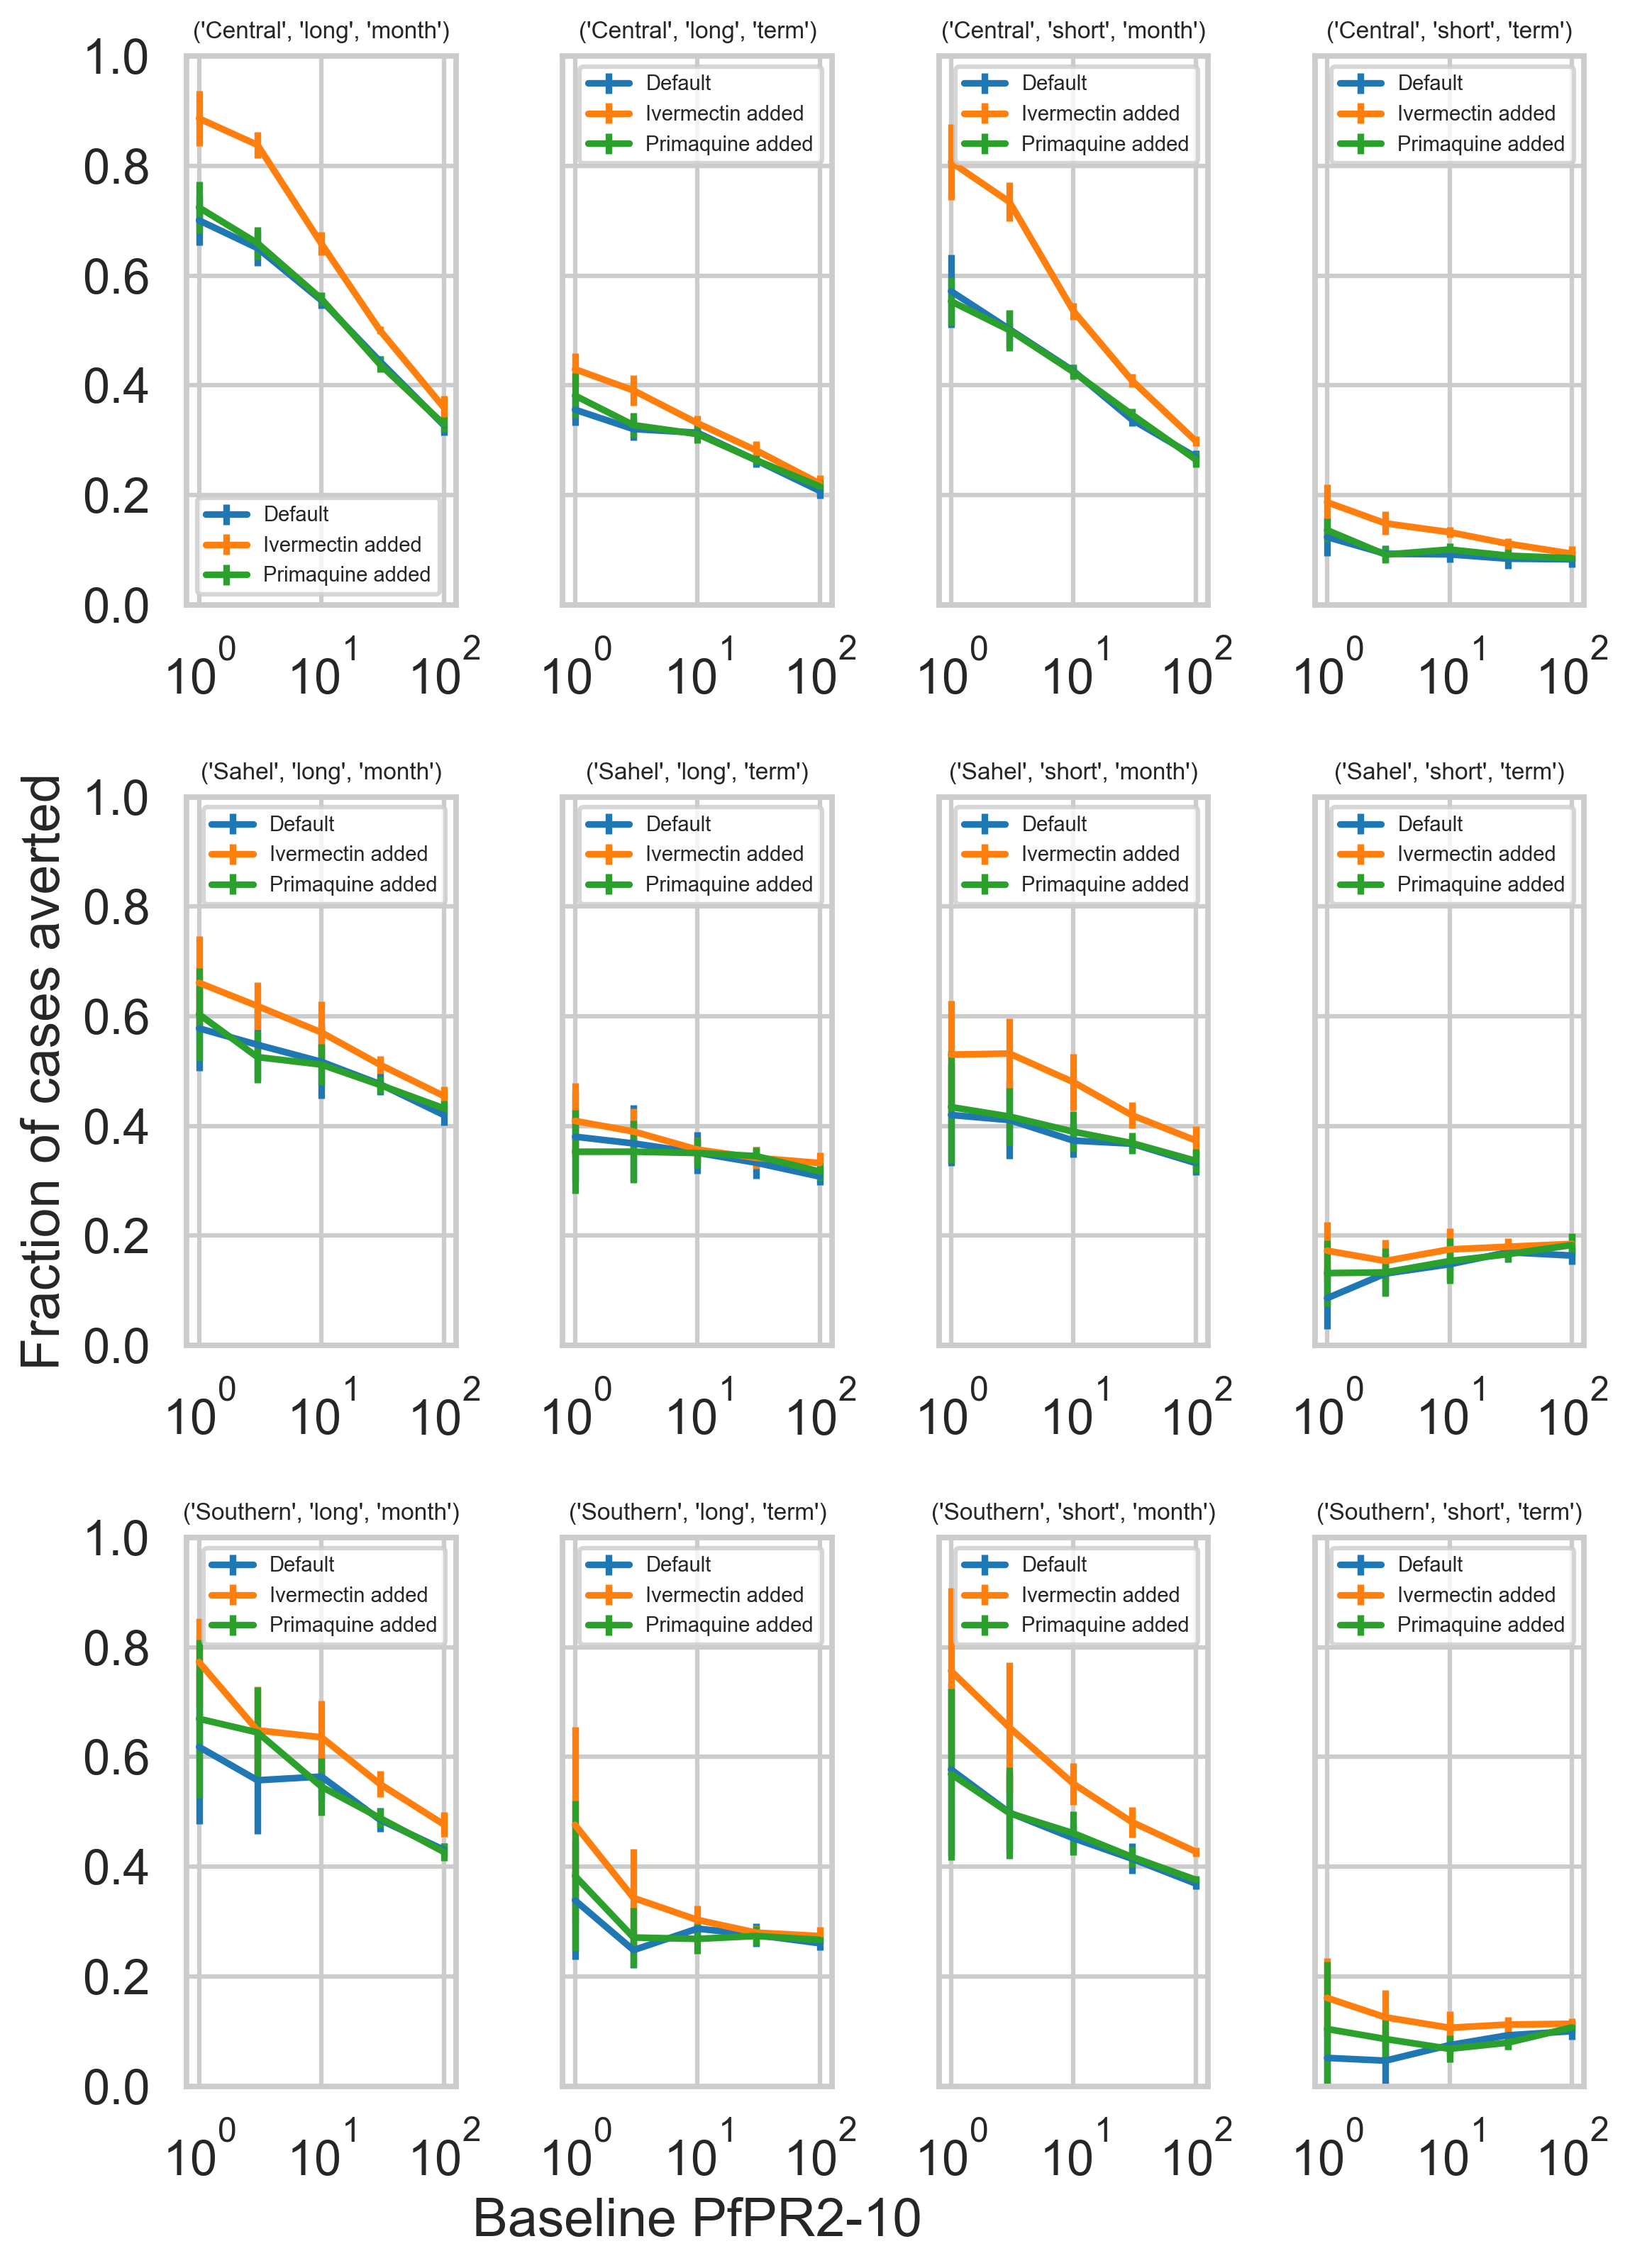

In [18]:
# subplot_order_dict = {"Sahel": {"ASAQ": 

# h = df_pfpr[df_pfpr["archetype"]=="Southern"]
i = 1
plt.figure(dpi=300, figsize=(8,11))
for ii, sdf in df_plot.groupby(["archetype", "drug_duration", "interval"]):
    archetype = ii[0]
    drug_type = sdf["drug_type"].iloc[0]
                                

    regular = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==False)]
    iver = sdf[np.logical_and(sdf["ivermectin"]==True, sdf["primaquine"]==False)]
    prim = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==True)]
    
    plt.subplot(3,4,i)
    plt.errorbar(regular["transmission_level"], regular["frac_averted_clinical__all"], yerr=regular["frac_averted_clinical__all_STDEV"], label="Default")
    plt.errorbar(iver["transmission_level"], iver["frac_averted_clinical__all"], yerr=iver["frac_averted_clinical__all_STDEV"], label="Ivermectin added")
    plt.errorbar(prim["transmission_level"], prim["frac_averted_clinical__all"], yerr=prim["frac_averted_clinical__all_STDEV"], label="Primaquine added")
    plt.title(ii, fontsize=8)
    # plt.ylabel("Total cases averted")
    # plt.xlabel("Baseline PfPR2-10")
    
    # if i == 1:
    plt.legend(fontsize=7)
        
    if i not in [1,5,9]:
        ax = plt.gca()
        ax.set_yticklabels([])
    if i == 5:
        plt.ylabel("Fraction of cases averted")
    # if i in [9,10,11,12]:
        # plt.xlabel("Baseline PfPR2-10")
    if i == 10:
        plt.xlabel("Baseline PfPR2-10")
    
    plt.ylim([0,1.0])
    plt.xscale("log")
    plt.tight_layout()
    i+=1
plt.savefig("transmission_target_EIR.pdf")
plt.savefig("transmission_target_EIR.png")